In [1]:
import numpy as np
import random as rd
from time import time
import matplotlib.pyplot as plt

In [2]:
class site:
    def __init__(self,lattice,x,y,z):
        self.x = x
        self.y = y
        self.z = z
        self.lattice = lattice

    def setspin(self,s):
        self.spin = s
    
    def setrandomspin(self): # set random spin for this site
        self.spin = rd.choice([-1,1]) # set spin = -1 or 1
     
    def getspin(self):
        return self.spin

    def flipspin(self):
        self.spin *= -1

    def getposition(self):
        return np.array([self.x,self.y,self.z])

    def getzeemanenergy(self,B):
        g = 2.0
        muB = 5e-2 #mev/T
        return -g*muB*self.getspin()*B

    def getdeltaexchangeenergy(self,J):
        E = 0
        NN = self.getnearestneighbourscubic()
        for nn in NN:
            E += -J*self.spin*nn.spin
        return E

    def getlistposition(self,x,y,z):
        return x*self.lattice.N2*self.lattice.N3 + y*self.lattice.N3 + z

    def getnearestneighbourscubic(self):
        #i-1 i+1, j-1 j+1, k-1 k+1 with periodic boundary conditions
        NN1 = self.lattice.sites[self.getlistposition((self.x-1) % self.lattice.N1, self.y, self.z)]
        NN2 = self.lattice.sites[self.getlistposition((self.x+1) % self.lattice.N1, self.y, self.z)]
        NN3 = self.lattice.sites[self.getlistposition(self.x, (self.y-1) % self.lattice.N1, self.z)]
        NN4 = self.lattice.sites[self.getlistposition(self.x, (self.y+1) % self.lattice.N1, self.z)]
        NN5 = self.lattice.sites[self.getlistposition(self.x, self.y, (self.z-1) % self.lattice.N1)]
        NN6 = self.lattice.sites[self.getlistposition(self.x, self.y, (self.z+1) % self.lattice.N1)]
        return [NN1,NN2,NN3,NN4,NN5,NN6]

In [3]:
class lattice:
    def __init__(self,N1,N2,N3):
        self.N1 = N1 # Dimension of the lattice
        self.N2 = N2
        self.N3 = N3
        self.sites = [] # Creating a list to take in the information of sites

    def populatesites(self):
        for i in range(self.N1):
            for j in range(self.N2):
                for k in range(self.N3):
                    self.sites.append(site(lat,i,j,k)) # Assign each site a coordianate

    def initialisespins(self): # Set spin for each site
        for i in range(self.N1*self.N2*self.N3):
            self.sites[i].setrandomspin()
    
    def gettotalenergy(self,J):
        E_t = 0
        for i in range(self.N1*self.N2*self.N3):
            E_t = E_t + self.sites[i].getdeltaexchangeenergy(J)
        E_t = abs(E_t/2)
        return E_t
    
    def filprandomspins(self): # input number of moves
        #self.filp = np.ones(self.N1*self.N2*self.N3)
        #self.filp[rd.randrange(self.N1*self.N2*self.N3)] = -1 # choose a random site to flip
        site_f = rd.randrange(self.N1*self.N2*self.N3)
        self.sites[site_f].flipspin()
        return site_f
    
    def checkfilp(self,E,J,T_pace,T,site_f):
        deltaE = self.sites[site_f].getdeltaexchangeenergy(J)
        #accept flip if energy change in temperature range:
        if deltaE <= 0 or np.exp(-deltaE/(kB*T))>rd.random():
            E += deltaE
            T = T_pace*T # decrease temperature
        else: # flip back
            self.sites[site_f].flipspin()
        return T,E
    
    def MC(self,E_t,MCS,J,T_pace,T_start): # Monte carlo model
        T_plot = np.zeros(MCS) # setup 
        E_plot = np.zeros(MCS) # setup
        T = T_start
        E = E_t
        i = 0
        #for i in range(MCS):
        while MCS > 0:
            site_f = self.filprandomspins()
            deltaE = self.sites[site_f].getdeltaexchangeenergy(J)
            #print("deltaE = ", deltaE)
            if deltaE <= 0 or np.exp(-deltaE/(kB*T))>rd.random():
                E += deltaE
                T = T_pace*T # decrease temperature
                T_plot[i] = T
                E_plot[i] = E
                i = i+1
                MCS = MCS-1
                #print("E = ", E)
                #print("T = ", T)
                #print("MCS = ", MCS)
            else:
                self.sites[site_f].flipspin()
        
        return T_plot,E_plot

- Sites

- spins

- flip 

- energy

- vary nom

- energy

- 100

In [4]:
starttime = time()

# set up some constants
g = 2.0
muB = 5.788e-2 # meV/T
kB = 8.617e-2 # meV/K
T_start = 200 # K
T_pace = 0.92
MCS = 100
J = 100 # +ve is FM, -ve is AFM, units meV

# set up the sites
lat = lattice(10,10,10) # set up the size of lattice
lat.populatesites()     # Assign each site a coordinate
lat.initialisespins()   # Assign each site a random spin
E_t = lat.gettotalenergy(J)    # get the total energy of the system
print(E_t)
T,E = lat.MC(E_t,MCS,J,T_pace,T_start)
# Repeat

#lat.fliprandomspin()    # flip random spin
#lat.checkflip(T_step,T) # check the flip
# Record T and E
# stop until T falls beyond certain threshold or MC steps

# Repeat

print ("Runtime:  %.6f"  %(time()-starttime))

12400.0
Runtime:  0.006695


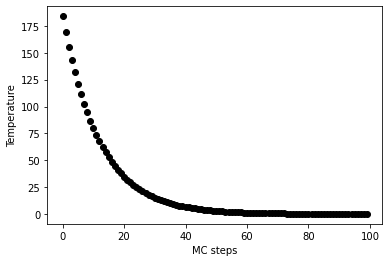

In [5]:
MCS_p = np.arange(0,100)
plt.close('all')
plt.figure()
plt.plot(MCS_p,T,'ok')
plt.xlabel('MC steps')
plt.ylabel('Temperature')
#plt.xlim([0,120])
#plt.ylim([-0.25,0.05])
plt.show()

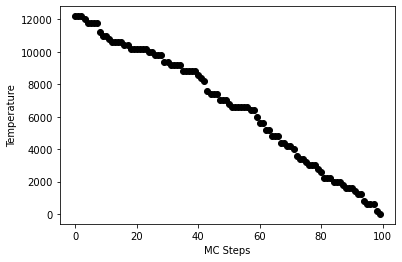

In [6]:
MCS_p = np.arange(0,100)
plt.close('all')
plt.figure()
plt.plot(MCS_p,E,'ok')
plt.xlabel('MC Steps')
plt.ylabel('Energy')
#plt.xlim([0,120])
#plt.ylim([-0.25,0.05])
plt.show()